In [64]:
import math
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, Adagrad, SGD

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [283]:
!pip install neupy

     |████████████████████████████████| 226 kB 4.1 MB/s 
     |████████████████████████████████| 92.7 MB 1.2 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 367 kB 45.3 MB/s 
     |████████████████████████████████| 3.2 MB 16.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progre

In [5]:
from neupy import algorithms
from neupy.layers import Input, Tanh, Linear 

In [65]:
def elipse(a, b, t, x0, y0, k):
  x = a * math.cos(t) + x0
  y = b * math.sin(t) + y0
  return x, y, k

def parabole(p, t, x0, y0):
  x=t*t/(2*p)+x0
  y=t+y0
  return x, y, 2

In [66]:
X1 = []

for i in range(60):
  t = random.uniform(0, 2 * math.pi)
  X1.append(elipse(0.4, 0.4, t, -0.1, 0.15, 0))

for i in range(100):
  t = random.uniform(0, 2 * math.pi)
  X1.append(elipse(0.7, 0.7, t, 0, 0, 1))

for i in range(120):
  t = random.uniform(0, 2 * math.pi)
  X1.append(parabole(-1, t, 0.8, 0))

In [67]:
df = pd.DataFrame(X1, columns =['x', 'y', 'class'])

In [68]:
df = shuffle(df)

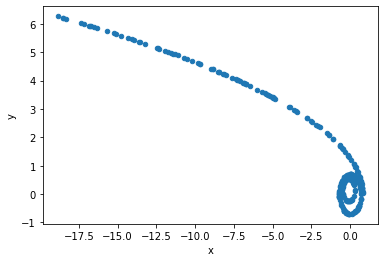

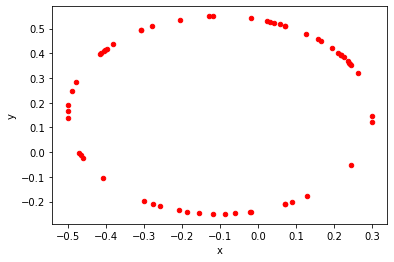

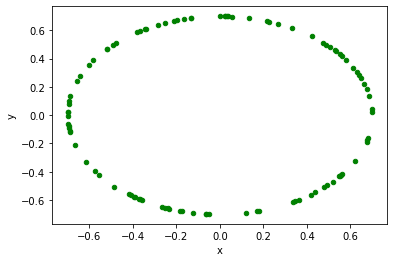

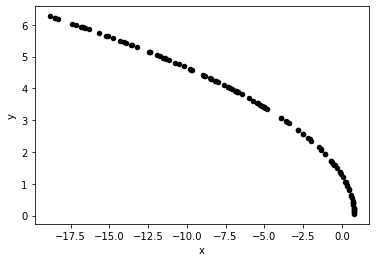

In [87]:
df.plot.scatter(x="x", y="y");
df[df['class'] == 0].plot.scatter(x="x", y="y", color = 'red');
df[df['class'] == 1].plot.scatter(x="x", y="y", color = 'green');
df[df['class'] == 2].plot.scatter(x="x", y="y", color = 'black');

In [149]:
y = np.array(pd.get_dummies(df['class']))

In [150]:
X_train, X_test, y_train, y_test = train_test_split(df[['x', 'y']], y, test_size=0.3, random_state=42)

X_control, X_test, y_control, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [151]:
model = Sequential()
model.add(Dense(20, input_shape=(2,), activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(Adam(learning_rate=0.01), 'categorical_crossentropy', metrics=['accuracy'])

In [152]:
X_control = X_control.to_numpy()
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()

In [183]:
history = model.fit(X_train, y_train, epochs=300, verbose=1, shuffle=True)

Epoch 1/300
7/7 [==============================] - 0s 2ms/step - loss: 9.9114e-05 - accuracy: 1.0000
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 9.9756e-05 - accuracy: 1.0000
Epoch 3/300
7/7 [==============================] - 0s 3ms/step - loss: 9.8098e-05 - accuracy: 1.0000
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 9.8547e-05 - accuracy: 1.0000
Epoch 5/300
7/7 [==============================] - 0s 3ms/step - loss: 9.7370e-05 - accuracy: 1.0000
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 9.7412e-05 - accuracy: 1.0000
Epoch 7/300
7/7 [==============================] - 0s 3ms/step - loss: 1.1380e-04 - accuracy: 1.0000
Epoch 8/300
7/7 [==============================] - 0s 3ms/step - loss: 1.1159e-04 - accuracy: 1.0000
Epoch 9/300
7/7 [==============================] - 0s 3ms/step - loss: 9.6156e-05 - accuracy: 1.0000
Epoch 10/300
7/7 [==============================] - 0s 4ms/step - loss: 9.7321e-05 - accura

In [184]:
pred = model.predict(X_train)
true_pred = []
true_y_train = []
for p in range(len(pred)):
  true_pred.append(np.argmax(pred[p]))
  true_y_train.append(np.argmax(y_train[p]))

In [185]:
print(accuracy_score(true_y_train, true_pred))

1.0


In [186]:
pred = model.predict(X_test)
true_pred = []
true_y_test = []
for p in range(len(pred)):
  true_pred.append(np.argmax(pred[p]))
  true_y_test.append(np.argmax(y_test[p]))

In [187]:
print(accuracy_score(true_y_test, true_pred))

1.0


In [188]:
pred = model.predict(X_control)
true_pred = []
true_y_control = []
for p in range(len(pred)):
  true_pred.append(np.argmax(pred[p]))
  true_y_control.append(np.argmax(y_control[p]))

In [189]:
print(accuracy_score(true_y_control, true_pred))

1.0


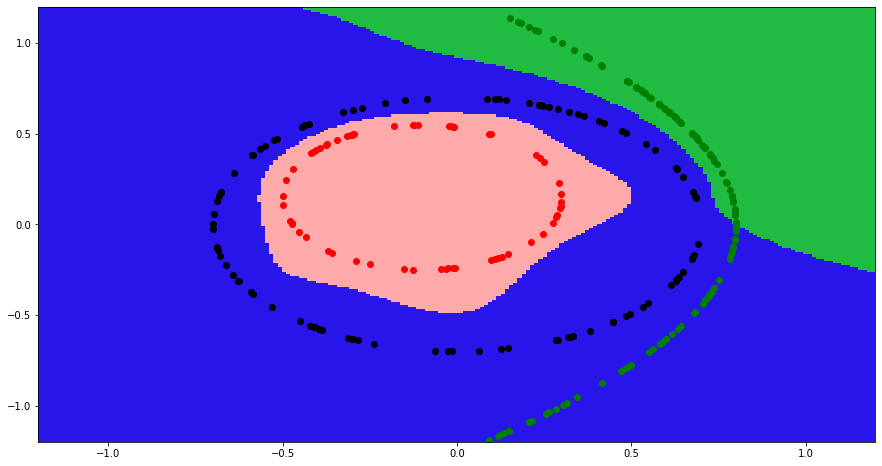

In [190]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))
eps = 0.1
xx, yy = np.meshgrid(np.linspace(-1.2, 1.2, 200),
                     np.linspace(-1.2, 1.2, 200))
F = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([])
s = model.predict(F)
ss = []
for p in s:
  ss.append(np.argmax(p))
Z = np.append(Z, ss)
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#2715ea', '#20bb42'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

X1 = []
Y1 = []
for i in range(60):
  t = random.uniform(0, 2 * math.pi)
  x, y, k = elipse(0.4, 0.4, t, -0.1, 0.15, 0)
  X1.append(x)
  Y1.append(y)
plt.scatter(X1, Y1, c = "red")

X1 = []
Y1 = []
for i in range(100):
  t = random.uniform(0, 2 * math.pi)
  x, y, k = elipse(0.7, 0.7, t, 0, 0, 1)
  X1.append(x)
  Y1.append(y)
plt.scatter(X1, Y1, c = "black")

X1 = []
Y1 = []
for i in range(120):
  t = random.uniform(-1.2,1.2)
  x, y, k = parabole(-1, t, 0.8, 0)
  X1.append(x)
  Y1.append(y)
plt.scatter(X1, Y1, c = "green")
plt.show()

In [44]:
#2 часть
def x_func(t):
  return np.sin(t * t - 10 * t + 3)

h = 0.025
tt = []
t = 1
YY = []
X = []
while t <= 6:
  tt.append(t)
  YY.append(round(x_func(t))) #целая часть числа
  X.append(x_func(t))
  t += h

In [9]:
X = np.array(tt)
Y = np.array(X)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [278]:
model = Sequential()
model.add(Dense(30, input_shape=(1,), activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 30)                60        
                                                                 
 dense_43 (Dense)            (None, 1)                 31        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
None


In [279]:
history = model.fit(X_train, y_train , epochs=600, verbose=1)

Epoch 1/600
6/6 [==============================] - 0s 3ms/step - loss: 0.5924
Epoch 2/600
6/6 [==============================] - 0s 2ms/step - loss: 0.5107
Epoch 3/600
6/6 [==============================] - 0s 3ms/step - loss: 0.4472
Epoch 4/600
6/6 [==============================] - 0s 3ms/step - loss: 0.3939
Epoch 5/600
6/6 [==============================] - 0s 3ms/step - loss: 0.3445
Epoch 6/600
6/6 [==============================] - 0s 2ms/step - loss: 0.3090
Epoch 7/600
6/6 [==============================] - 0s 2ms/step - loss: 0.2754
Epoch 8/600
6/6 [==============================] - 0s 3ms/step - loss: 0.2464
Epoch 9/600
6/6 [==============================] - 0s 2ms/step - loss: 0.2214
Epoch 10/600
6/6 [==============================] - 0s 2ms/step - loss: 0.1986
Epoch 11/600
6/6 [==============================] - 0s 2ms/step - loss: 0.1781
Epoch 12/600
6/6 [==============================] - 0s 3ms/step - loss: 0.1597
Epoch 13/600
6/6 [==============================] - 0s 2ms/st

RMSE = 0.12250029765287802


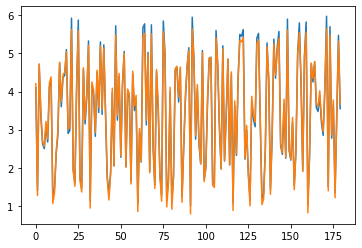

In [222]:
plt.plot(y_train, label='train')
pred = model.predict(X_train)
plt.plot(pred, label='predictTrain')
mse = mean_squared_error(y_train, pred.flatten())
print(f'RMSE = {np.sqrt(mse)}')

RMSE = 0.106439863093823


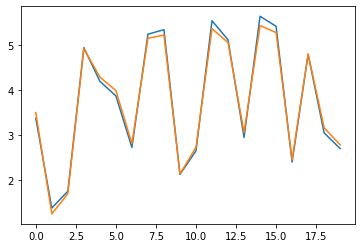

In [223]:
plt.plot(y_test, label='test')
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred.flatten())
plt.plot(pred, label='predictTest')
print(f'RMSE = {np.sqrt(mse)}')

In [224]:
from sklearn.neural_network import MLPRegressor
r = MLPRegressor(learning_rate= 'adaptive', hidden_layer_sizes=(10,), learning_rate_init = 0.05, momentum = 0.9, max_iter = 600, solver = 'sgd', activation = 'logistic')

In [225]:
loss = r.fit(X_train.reshape(-1, 1), y_train)
r.score(X_train.reshape(-1, 1), y_train)

0.9970381355706894

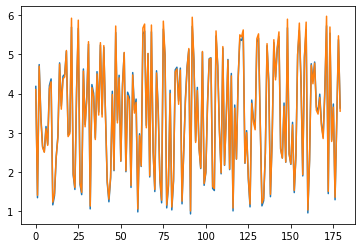

In [226]:
pred = r.predict(X_train.reshape(-1, 1))
plt.plot(pred)
plt.plot(y_train)

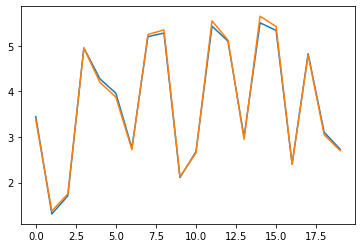

In [227]:
pred = r.predict(X_test.reshape(-1, 1))
plt.plot(pred)
plt.plot(y_test)

In [228]:
print(r.score(X_test.reshape(-1, 1), y_test))

0.9978173878218335


In [45]:
h = 0.025
t = np.linspace(1, 6, int(6/h), endpoint=True)
X = x_func(t)

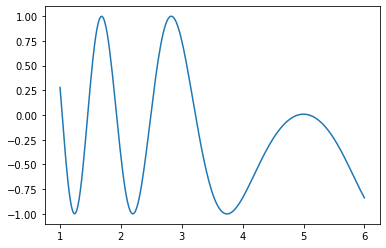

In [46]:
#третья часть
plt.plot(t, X)

In [124]:
model = algorithms.QuasiNewton(Input(1) >> Tanh(10) >> Linear(1), update_function='bfgs') #метод оптимизации функций многих переменных второго порядка

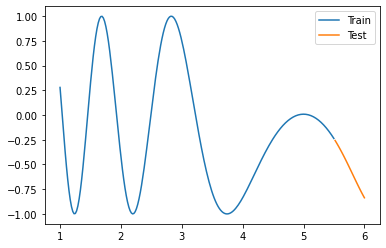

In [110]:
train_size = int(len(t) * 0.9)

X_train = t[:train_size]
y_train = X[:train_size]
plt.plot(X_train, y_train, label='Train')

X_test = t[train_size:]
y_test = X[train_size:]

plt.plot(X_test, y_test, label = 'Test')
plt.legend()
plt.show()

In [125]:
model.fit(X_train, y_train, epochs=600)

QuasiNewton((?, 1) -> [... 3 layers ...] -> (?, 1), verbose=False, show_epoch=1, shuffle_data=False, signals=None, target=Tensor("placeholder/target/linear-31:0", shape=(?, 1), dtype=float32), regularizer=None, loss=mse, wolfe_maxiter=20, wolfe_c1=0.0001, wolfe_c2=0.9, update_function=bfgs, epsilon=1e-07, h0_scale=1)

RMSE = 0.04952622703828579
RMSE = 0.5857851500772907


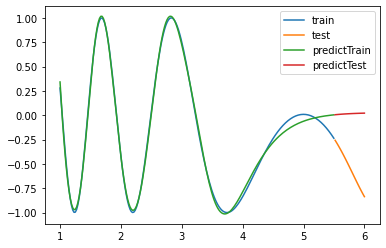

In [126]:
plt.plot(X_train, y_train, label='train')
plt.plot(X_test, y_test, label='test')

pred_x = model.predict(X_train)
mse = sklearn.metrics.mean_squared_error(y_train, pred_x.flatten())
plt.plot(X_train, pred_x, label='predictTrain')
print(f'RMSE = {np.sqrt(mse)}')


pred_x = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, pred_x.flatten())
plt.plot(X_test, pred_x, label='predictTest')
print(f'RMSE = {np.sqrt(mse)}')
plt.legend()
plt.show()